# Exploratory Data Analysis (EDA)

## Importing Dependencies

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Defining EDA Functions

In [28]:
## printing the shape and head
def head(df,shape_only=False):
    print(df.shape)

    if shape_only:
        return
    else:
        return df.head()

## for EDA of categorical values
def eda_bivariate_categorical(df,column,target):

    fig,ax = plt.subplots(figsize = (9,8))

    color = 'Set2'

    palette_color = sns.color_palette(color)

    ax = sns.countplot(x = column, data=df, hue=target,palette=color,order = df[column].value_counts().index)
    ax.set_ylabel('Count')

    offset = df[column].value_counts().max() * 0.005

    list_bars = df.groupby([column,target])[column].agg(['count']).unstack().fillna(0).values

    patches = ax.patches
    bars_pos = 0

    for i in range(df[target].nunique()):
        for j in range(df[column].nunique()):
            list_bars_col = list_bars[j]
            total_sum = list_bars_col.sum()
            value = list_bars_col[i]

            percentage = value / total_sum

            if percentage == 0:
                bars_pos += 1
                continue
            else:
                x = patches[bars_pos].get_x() + patches[j].get_width()/2
                y = patches[bars_pos].get_height() + offset
                ax.annotate('{:.1f}%'.format(percentage*100), (x, y), ha='center')
                bars_pos += 1
    plt.show()

## Function that plots numerical variables into histogram and violin plot
def eda_bivariate_numerical(data,column,target,color,
                    figsize=(12,6),
                    # save=True,
                    val=0,
                    target_type = 'Numerical'):

    fig, axes = plt.subplots(1, 2, figsize=figsize)
    cmap = sns.color_palette(color)
    val = val

    for i in range(1):
        for j in range(2):
            if j==0:
                    sns.histplot(data = data,x=data[column],hue=target,
                                bins=50,kde=True,palette=color,ax=axes[j])
                    axes[j].set(xlabel=None)
                    axes[j].grid(False)
            elif j==1:
                sns.boxplot(data = data,x=data[column],y = target, ax=axes[j], palette=color,orient='h',
                )
                axes[j].set(xlabel=None)
                axes[j].grid(False)
                val += 1
                plt.tight_layout()
            if target_type == 'Numerical':
                plt.suptitle(column)
            else:
                plt.suptitle(f'{column} vs. {target}')
    plt.show()

    # path = 'Figures\\Numerical\\'
    # if save:
    #     plt.savefig(f"{path}{column}.pdf",dpi=1000)


## print text to see the font
def print_text(text):
    fig, ax = plt.subplots(figsize=(6, 1), facecolor="#eefade")
    ax.text(0.5, 0.5, text, ha='center', va='center', size=40)
    ax.axis("off")
    plt.show()

def breakdown_dataset(df):
  """
  Breaks down the dataset and outputs each dimension in its own singular table and the first ten items for that dimension.

  Args:
    df: A Pandas DataFrame.

  Returns:
    None.
  """

  # Get the column names of the DataFrame.
  column_names = df.columns.tolist()

  # Iterate over the column names and print the first ten items for each column.
  for column_name in column_names:
    print(f"Column name: {column_name}")
    print(df[column_name].head(10))
    print("\n")

## Viewing Raw Dataset (Dimensions, Format and Target Variable)

In [29]:
# Read the CSV dataset into a Pandas DataFrame
df = pd.read_csv(".././data/raw/dataset.csv")

# Print the shape of the DataFrame
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

head(df,shape_only=False)


The dataset has 308854 rows and 19 columns.
(308854, 19)


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [30]:
# Break down the dataset and output each dimension in its own singular table and the first ten items for that dimension.
breakdown_dataset(df)

Column name: General_Health
0         Poor
1    Very Good
2    Very Good
3         Poor
4         Good
5         Good
6         Fair
7         Good
8         Fair
9         Fair
Name: General_Health, dtype: object


Column name: Checkup
0    Within the past 2 years
1       Within the past year
2       Within the past year
3       Within the past year
4       Within the past year
5       Within the past year
6       Within the past year
7       Within the past year
8       Within the past year
9       Within the past year
Name: Checkup, dtype: object


Column name: Exercise
0     No
1     No
2    Yes
3    Yes
4     No
5     No
6    Yes
7    Yes
8     No
9     No
Name: Exercise, dtype: object


Column name: Heart_Disease
0     No
1    Yes
2     No
3    Yes
4     No
5     No
6    Yes
7     No
8     No
9     No
Name: Heart_Disease, dtype: object


Column name: Skin_Cancer
0    No
1    No
2    No
3    No
4    No
5    No
6    No
7    No
8    No
9    No
Name: Skin_Cancer, dtype: object


Colu

### Setting the Target Variable

In [31]:
## Setting the target variable
target = 'Heart_Disease'

## Creating Numerical and Categorical Columns

In [32]:
## Creating numerical and categorical columns
numerical = df.select_dtypes(include=['float64']).columns.sort_values()
categorical = df.select_dtypes(include=['object']).columns.sort_values()

## Printing the length of numerical and categorical. The total length should have
## the same length as our dataframe
print(f'There are {len(categorical)} Categorical variables')
print(f'There are {len(numerical)} Numerical variables')

There are 12 Categorical variables
There are 7 Numerical variables


In [33]:
## Showing the columns in alphabetical order
df.columns.sort_values()

## Showing the descriptions of numerical variables
print('')
num_describe = df.describe().T
num_describe_table = num_describe.loc[:,['mean', 'std', '25%', '50%', '75%']]
print(num_describe_table)

## Showing the descriptions of categorical variables
print('')
object_describe_table = df.describe(include=object)
print(object_describe_table)


                                    mean        std     25%     50%     75%
Height_(cm)                   170.615249  10.658026  163.00  170.00  178.00
Weight_(kg)                    83.588655  21.343210   68.04   81.65   95.25
BMI                            28.626211   6.522323   24.21   27.44   31.85
Alcohol_Consumption             5.096366   8.199763    0.00    1.00    6.00
Fruit_Consumption              29.835200  24.875735   12.00   30.00   30.00
Green_Vegetables_Consumption   15.110441  14.926238    4.00   12.00   20.00
FriedPotato_Consumption         6.296616   8.582954    2.00    4.00    8.00

       General_Health               Checkup Exercise Heart_Disease  \
count          308854                308854   308854        308854   
unique              5                     5        2             2   
top         Very Good  Within the past year      Yes            No   
freq           110395                239371   239381        283883   

       Skin_Cancer Other_Cancer Depress

## Categorical EDA

### Target Variable Analysis

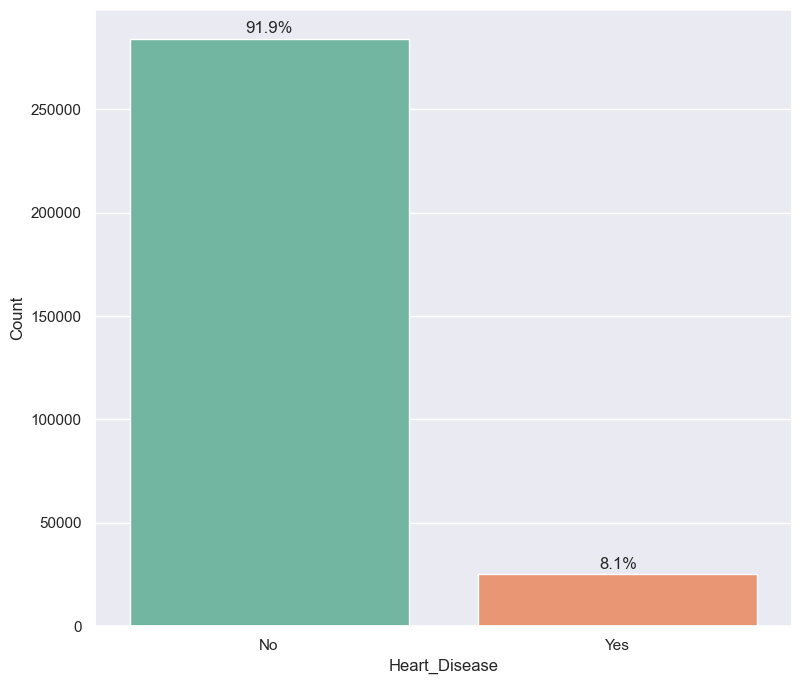

In [34]:
fig, ax = plt.subplots(figsize=(9, 8))

# Assign 'x' variable to 'hue' and set 'legend' to 'False'
ax = sns.countplot(x=target,
                   data=df,
                   hue=target,  # Assign 'x' variable to 'hue'
                   palette='Set2',
                   order=df[target].value_counts().index,
                   legend=False  # Set legend to False
                   )

sns.set(font='Arial')


ax.set_ylabel('Count')

patches = ax.patches

for j in range(len(patches)):
    percentage = list(df[target].value_counts())[j] / df[target].value_counts().sum()
    offset = df[target].value_counts().max() * 0.01
    x = patches[j].get_x() + patches[j].get_width() / 2
    y = patches[j].get_height() + offset
    ax.annotate('{:.1f}%'.format(percentage * 100), (x, y), ha='center')

plt.show()

### Univariate Analysis (Analysis of Each Categorical Dimension Individually)

General_Health


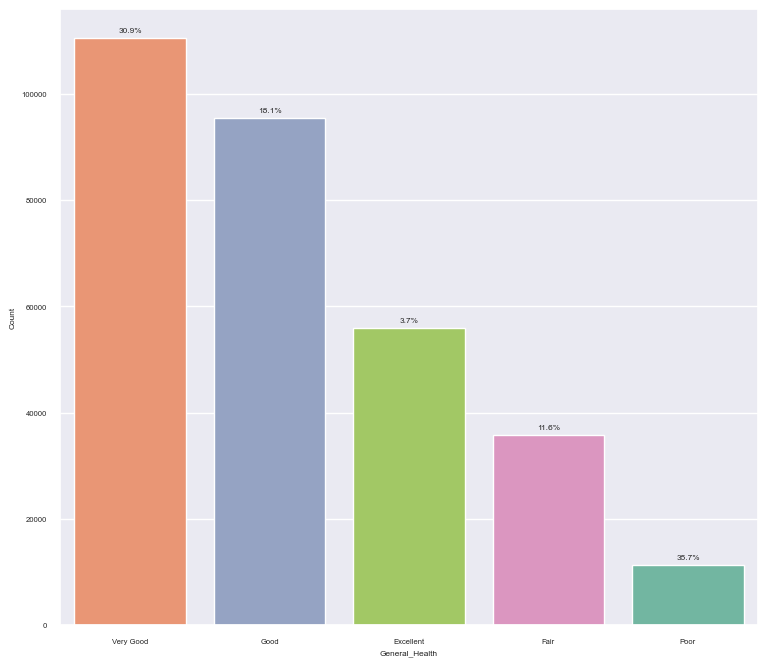

Checkup


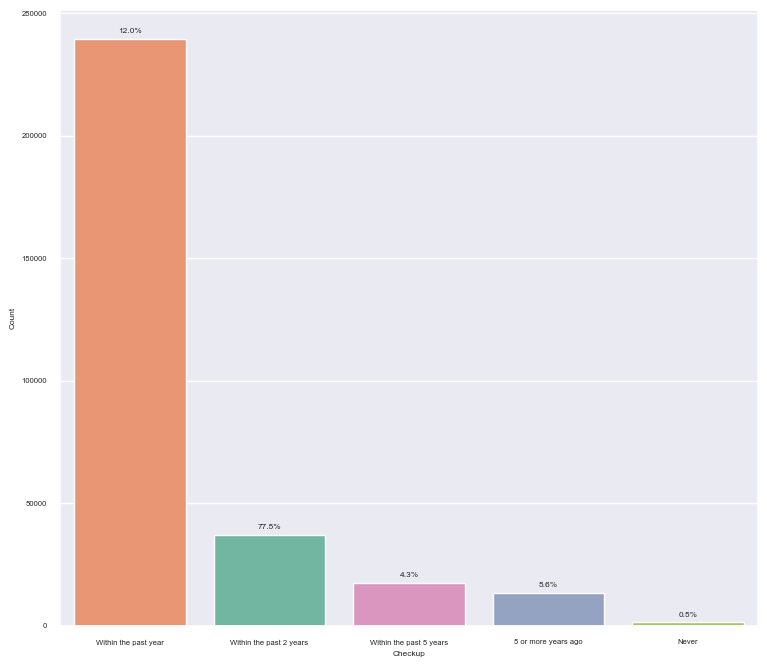

Exercise


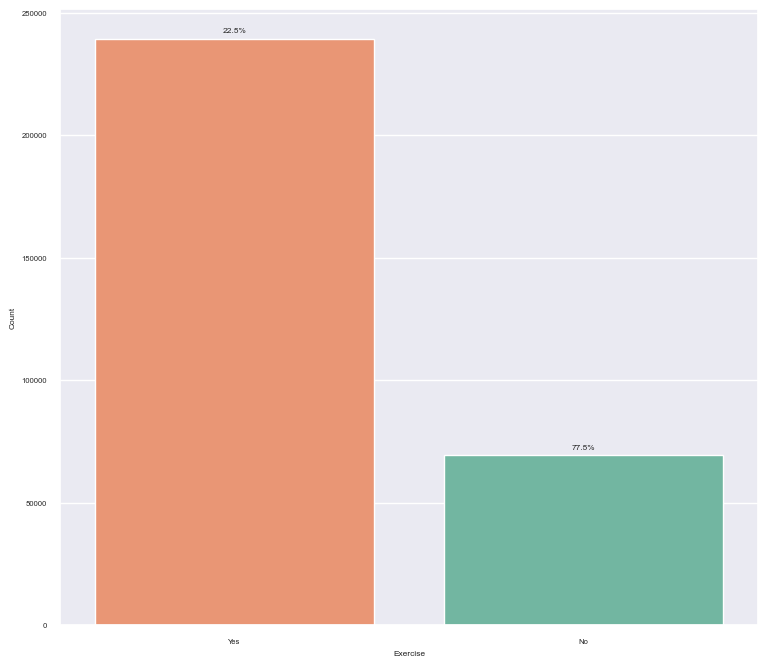

Skin_Cancer


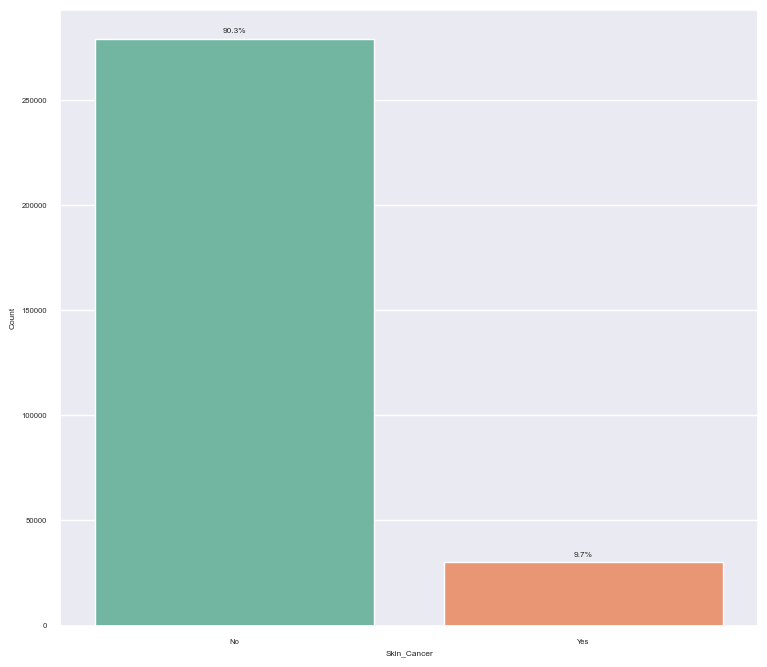

Other_Cancer


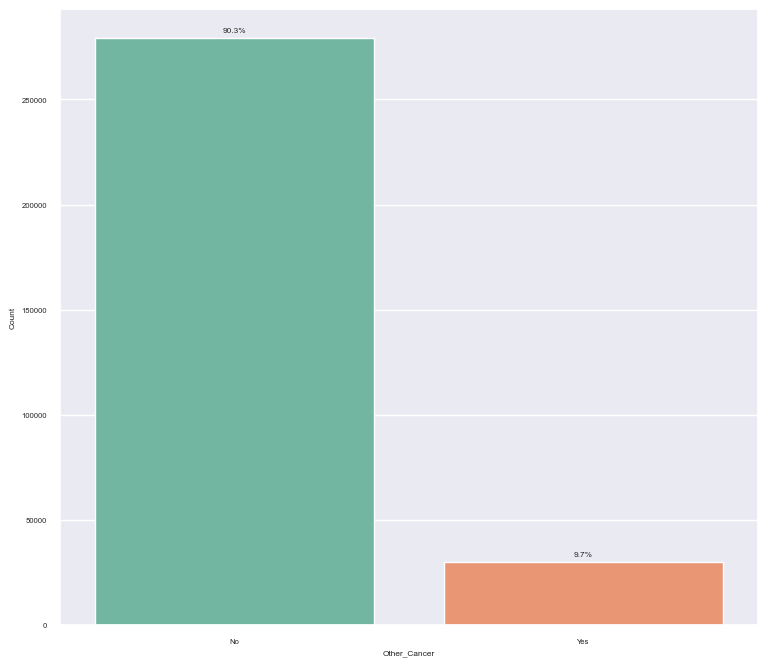

Depression


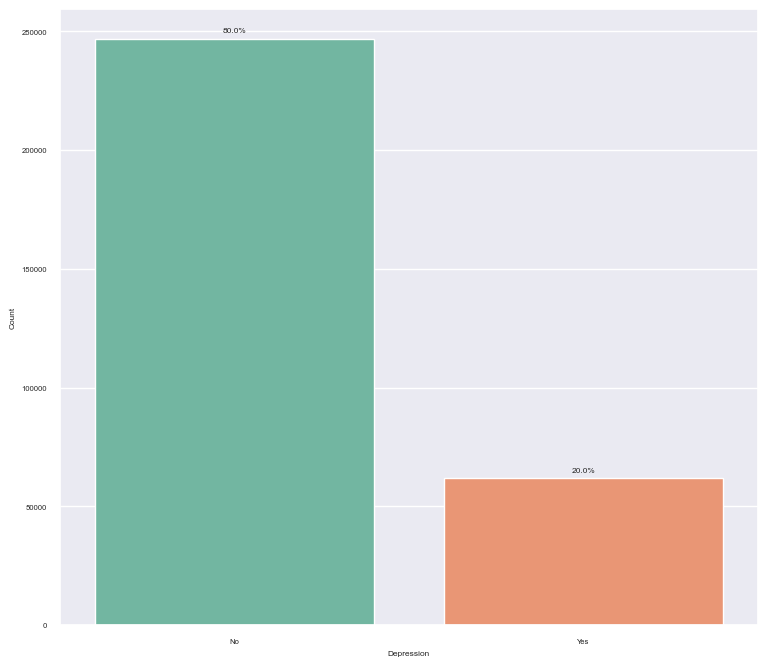

Diabetes


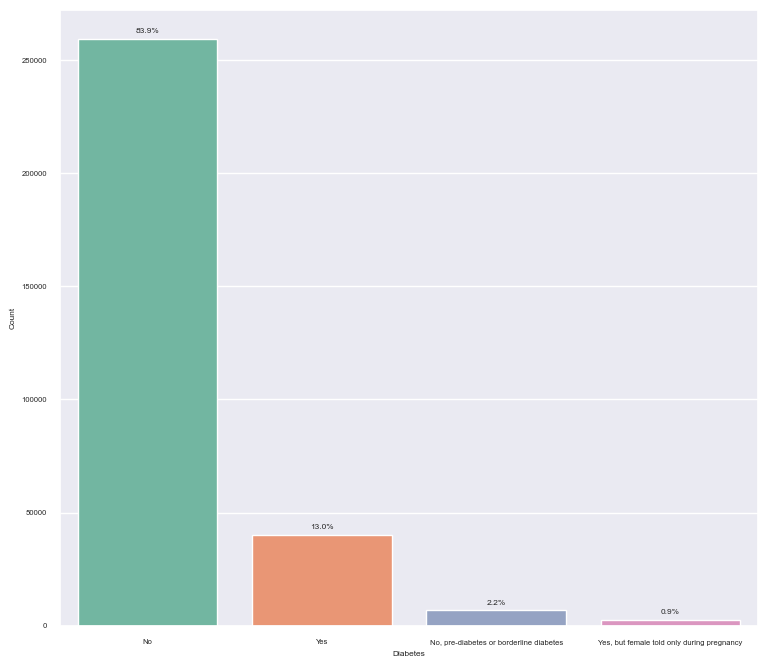

Arthritis


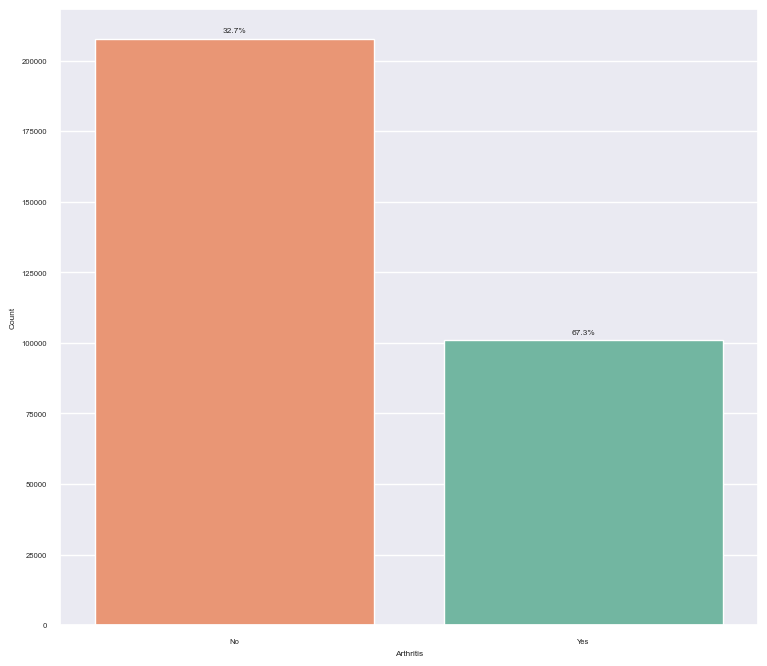

Sex


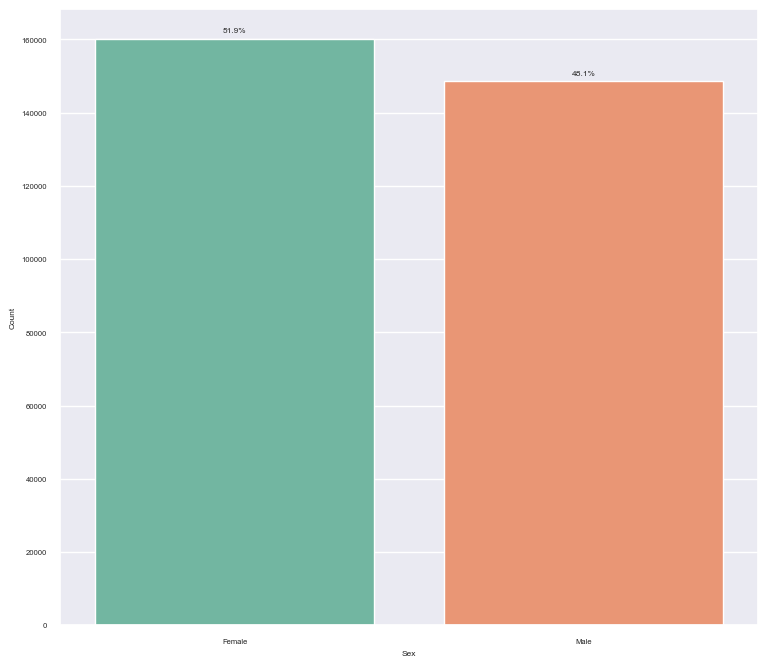

Age_Category


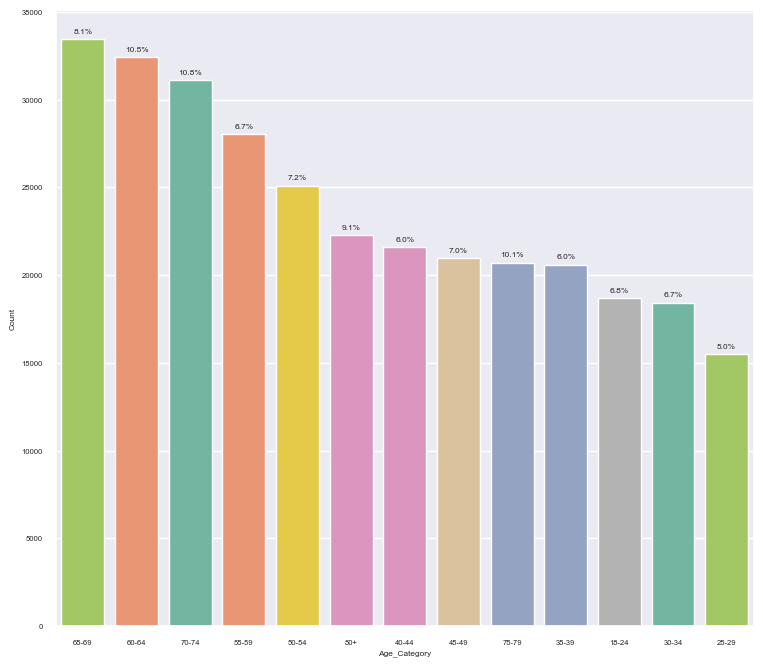

Height_(cm)


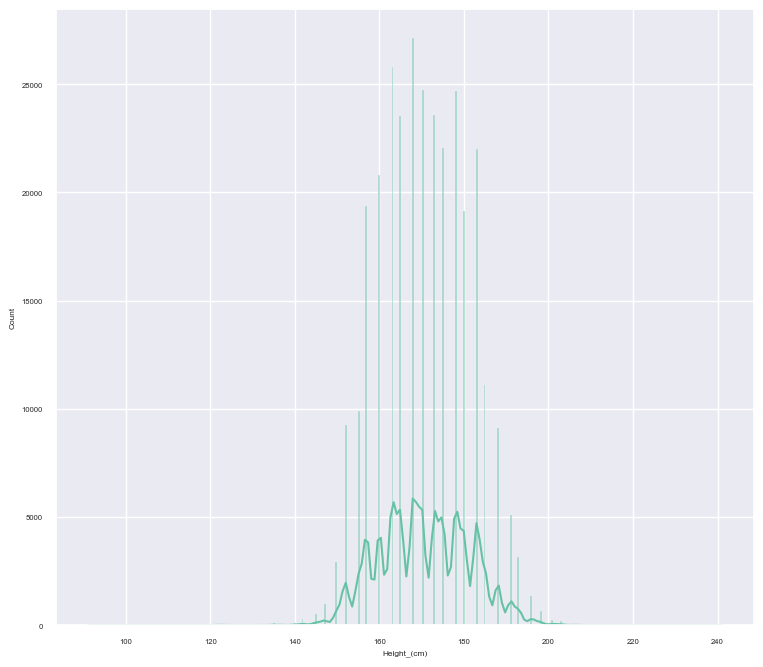

Weight_(kg)


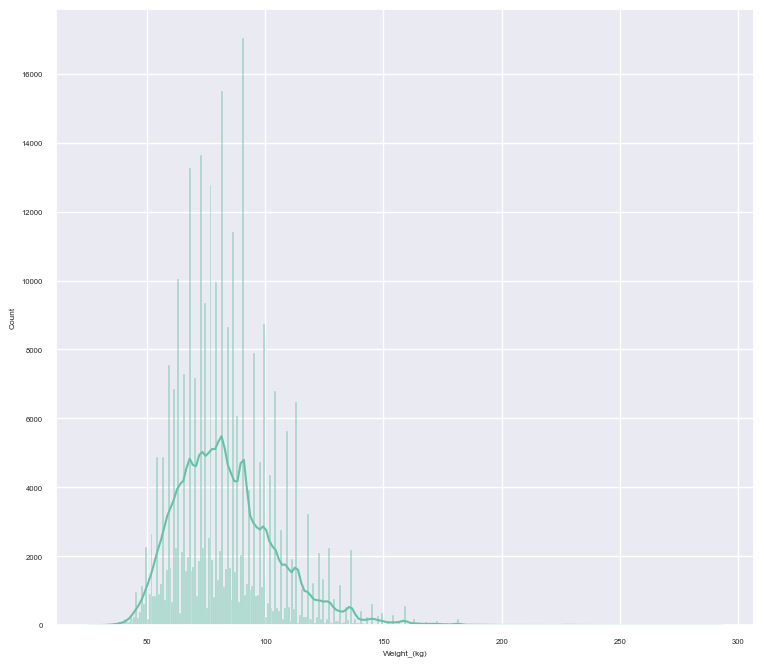

BMI


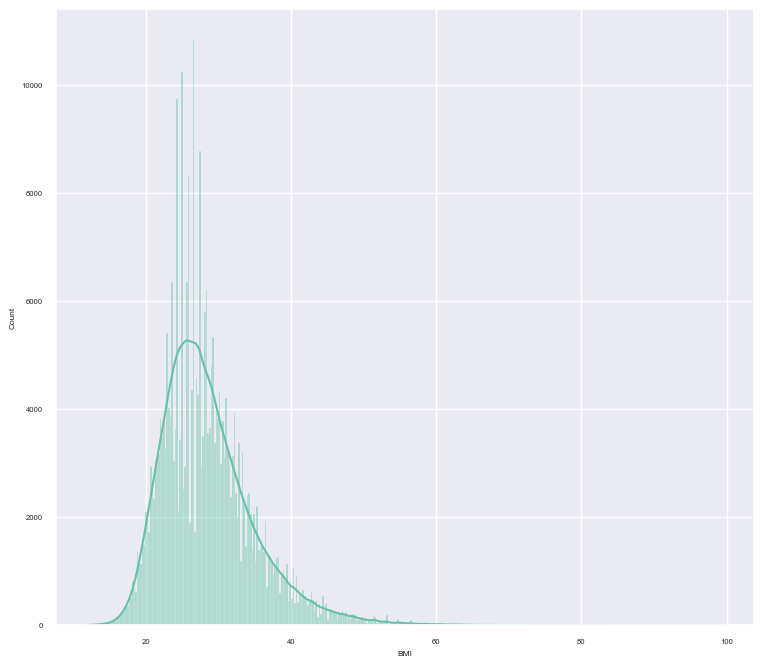

Smoking_History


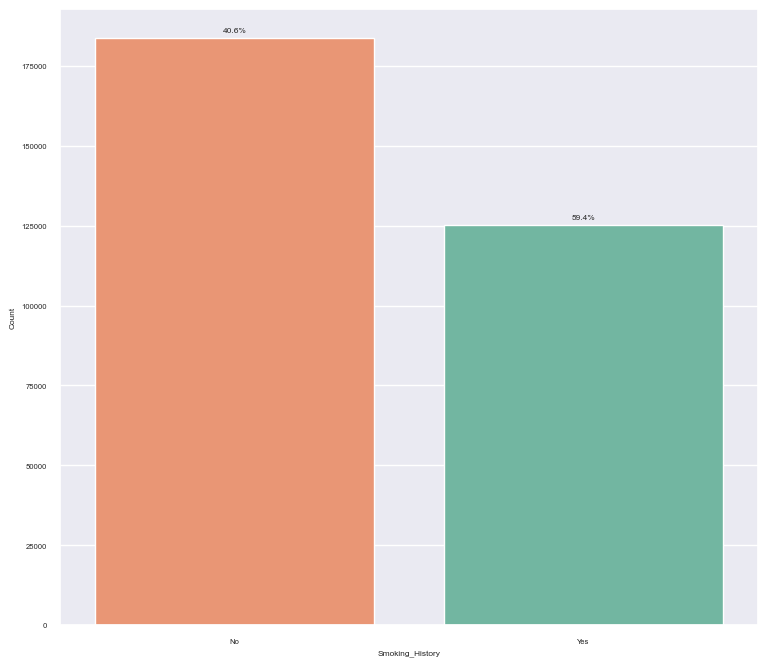

Alcohol_Consumption


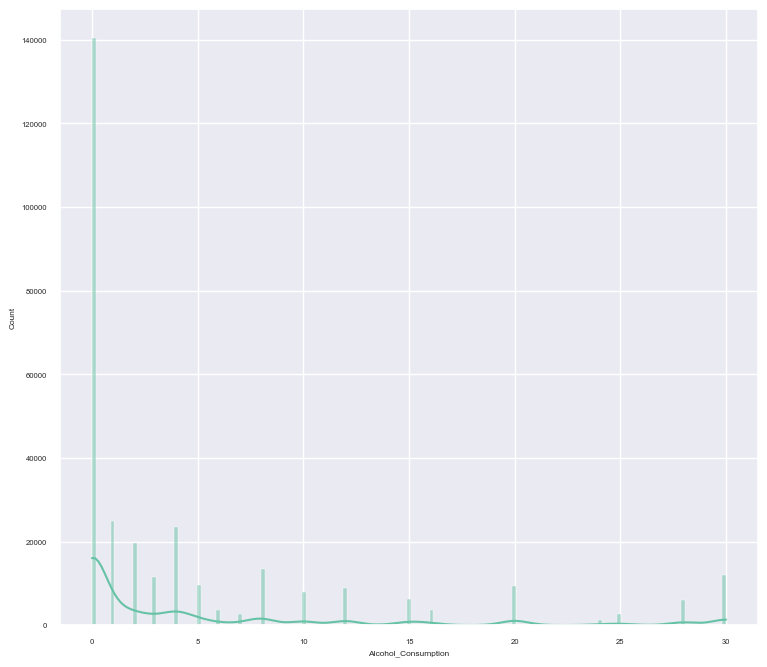

Fruit_Consumption


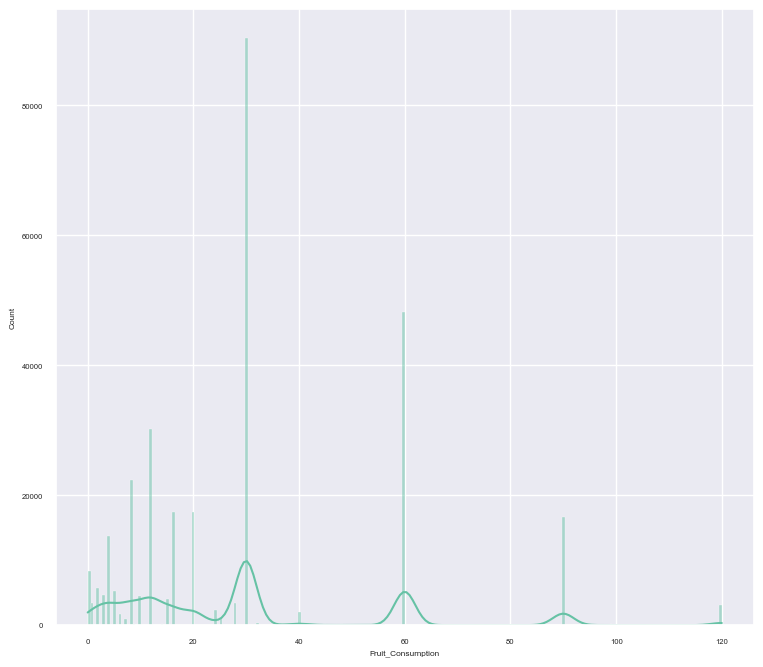

Green_Vegetables_Consumption


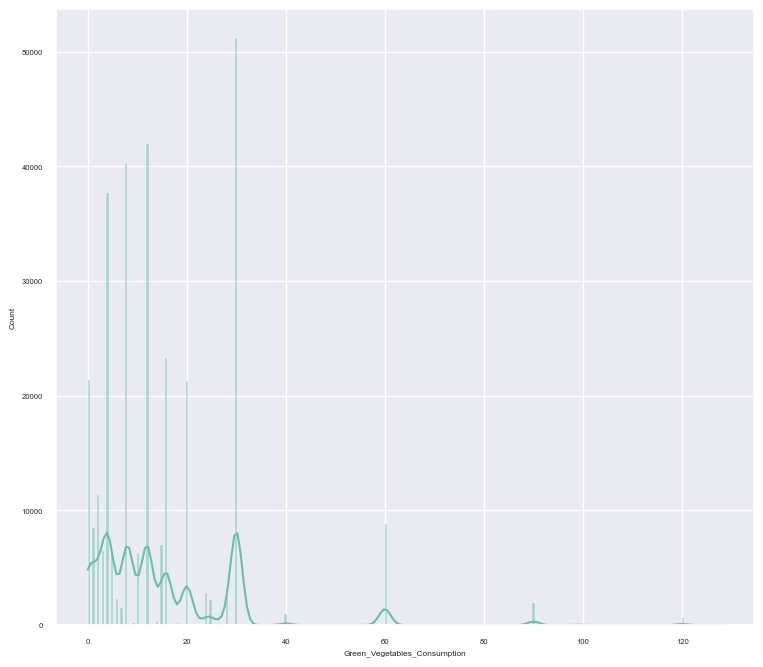

FriedPotato_Consumption


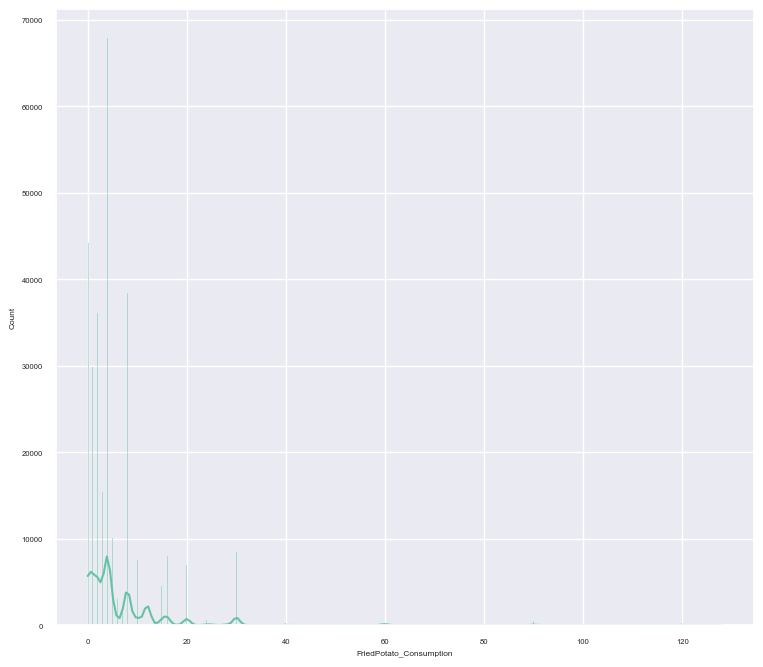

In [35]:
sns.set(font_scale=0.5)

for i in df.columns:
    if i == target:
        continue

    if i in categorical:
        if df[i].nunique() > 15:
            print(f'column {i} has many unique values n = {df[i].nunique()} and will not be plotted')
            print('=======================================================')
            continue
        else:
            print(f'{i}')
            fig, ax = plt.subplots(figsize=(9, 8))
            color = 'Set2'
            palette_color = sns.color_palette(color)
            
            # Assign 'x' variable to 'hue' and set 'legend' to 'False'
            ax = sns.countplot(x=i,
                data=df,
                hue=i,  # Assign 'x' variable to 'hue'
                palette=color,
                order=df[i].value_counts().index,
                legend=False  # Set legend to False
            )
            ax.set_ylabel('Count')

            patches = ax.patches

            for j in range(len(patches)):
                offset = df[i].value_counts().max() * 0.01
                percentage = list(df[i].value_counts())[j] / df[i].value_counts().sum()
                x = patches[j].get_x() + patches[j].get_width() / 2
                y = patches[j].get_height() + offset
                ax.annotate('{:.1f}%'.format(percentage * 100), (x, y), ha='center')

            plt.show()
            print('=======================================================')

    elif i in numerical:
        print(f'{i}')
        fig, ax = plt.subplots(figsize=(9, 8))
        color = 'Set2'
        palette_color = sns.color_palette(color)
        ax = sns.histplot(x=i,
            data=df,
            kde=True,
            color=palette_color[0],
        )
        ax.set_ylabel('Count')
        plt.show()
        print('=======================================================')

### Bivariate Analysis (Analysis of Each Categorical Dimension Against the Target Variable)

Age_Category vs. Heart_Disease


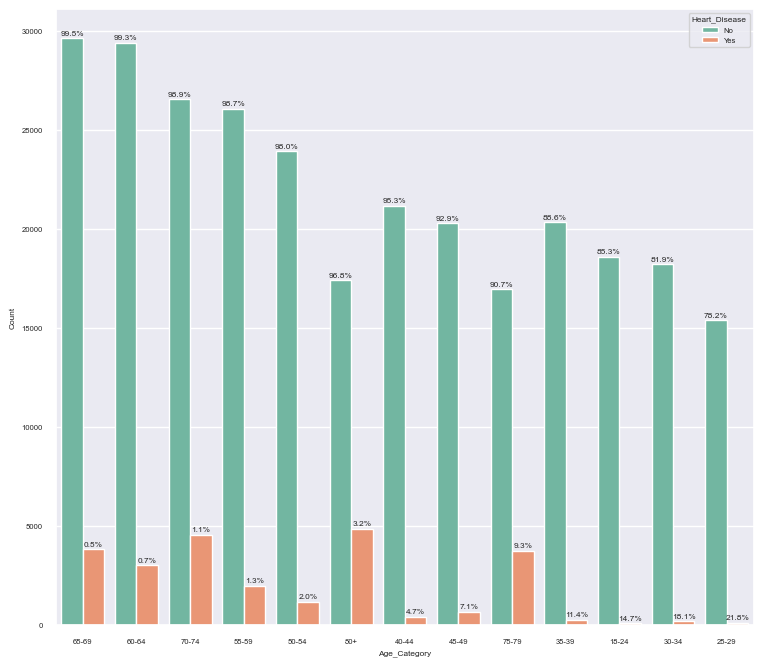

Arthritis vs. Heart_Disease


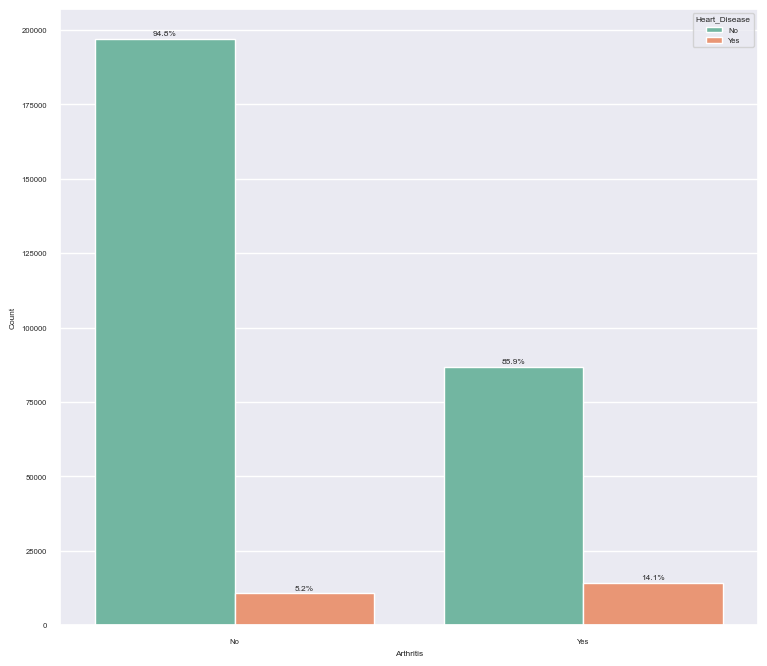

Checkup vs. Heart_Disease


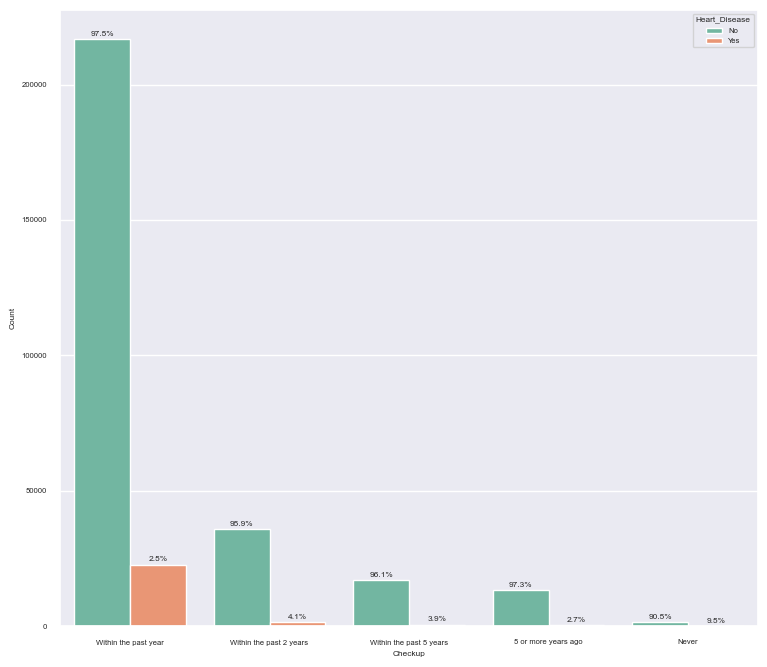

Depression vs. Heart_Disease


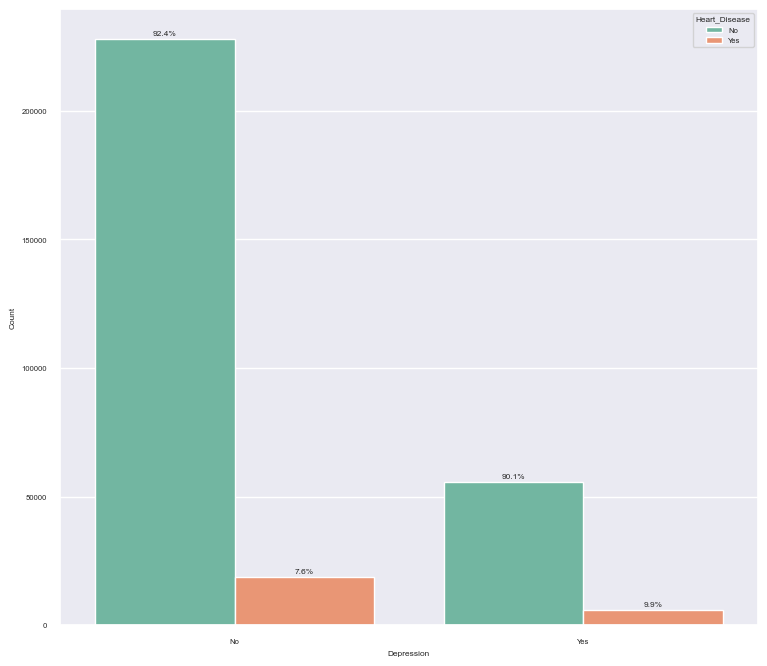

Diabetes vs. Heart_Disease


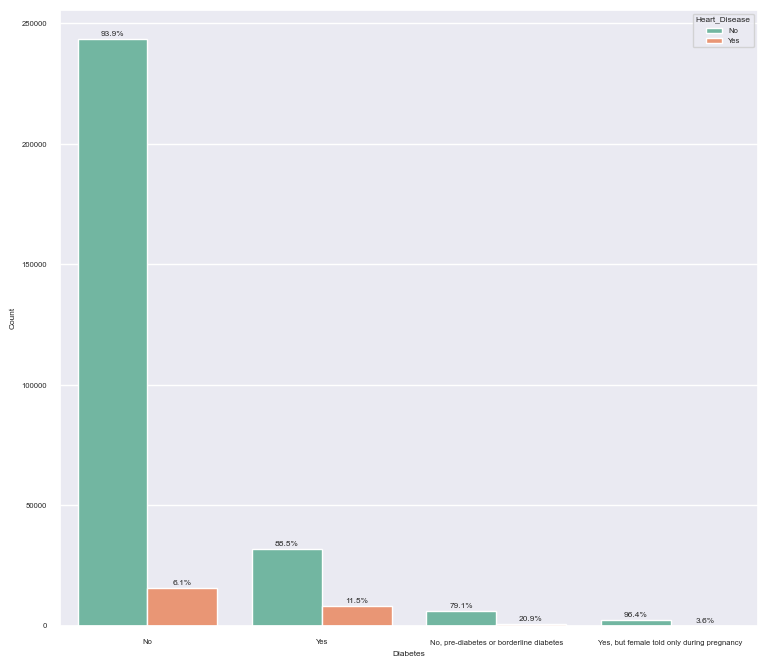

Exercise vs. Heart_Disease


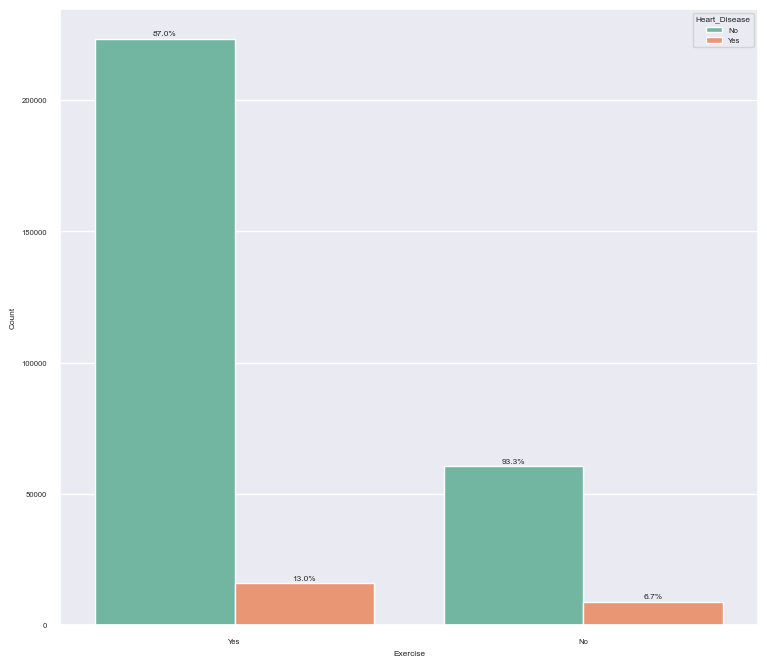

General_Health vs. Heart_Disease


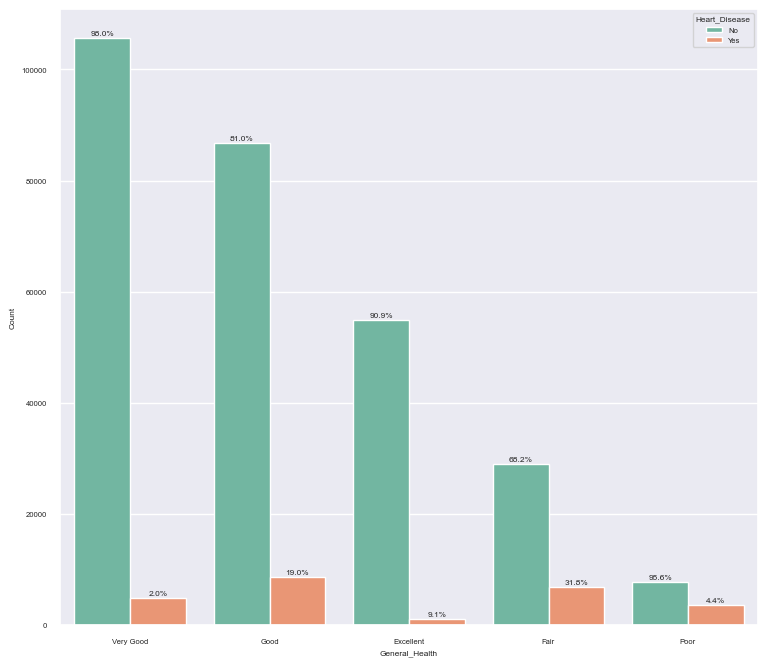

Other_Cancer vs. Heart_Disease


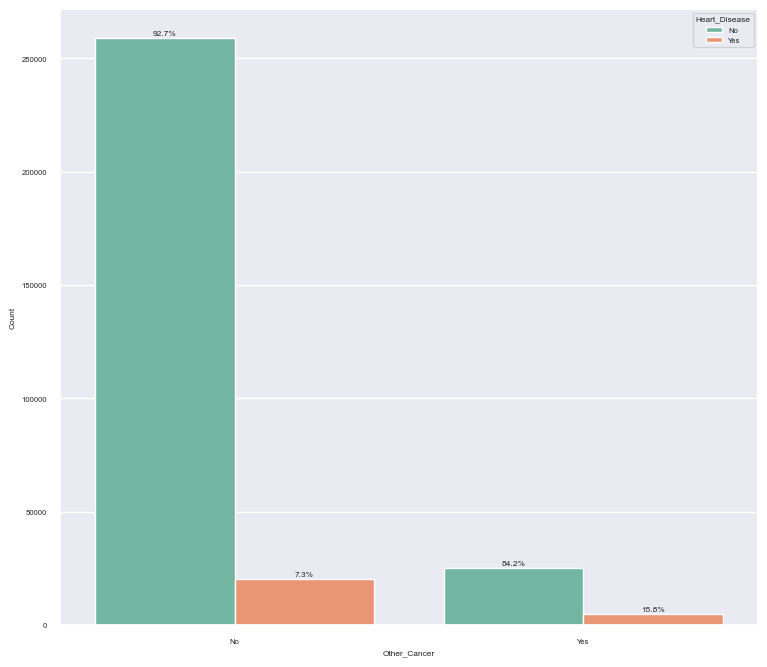

Sex vs. Heart_Disease


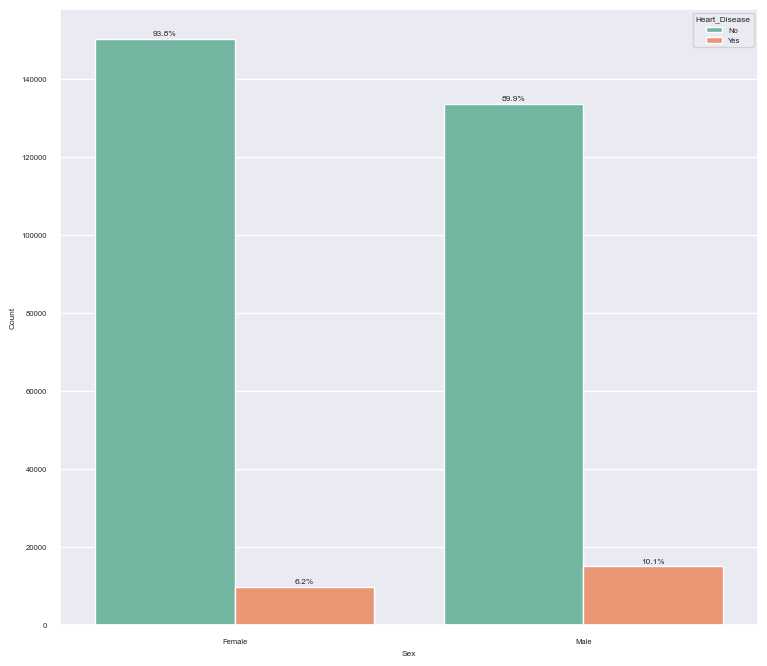

Skin_Cancer vs. Heart_Disease


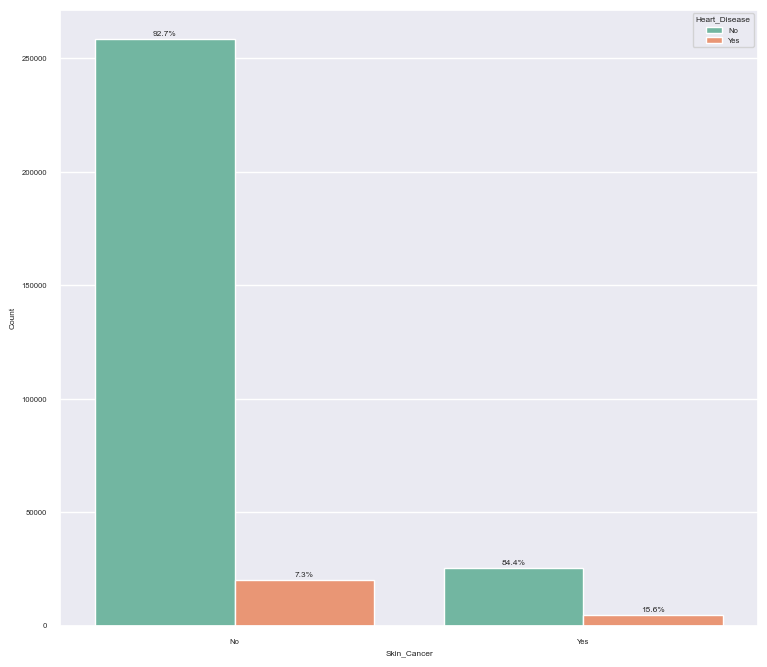

Smoking_History vs. Heart_Disease


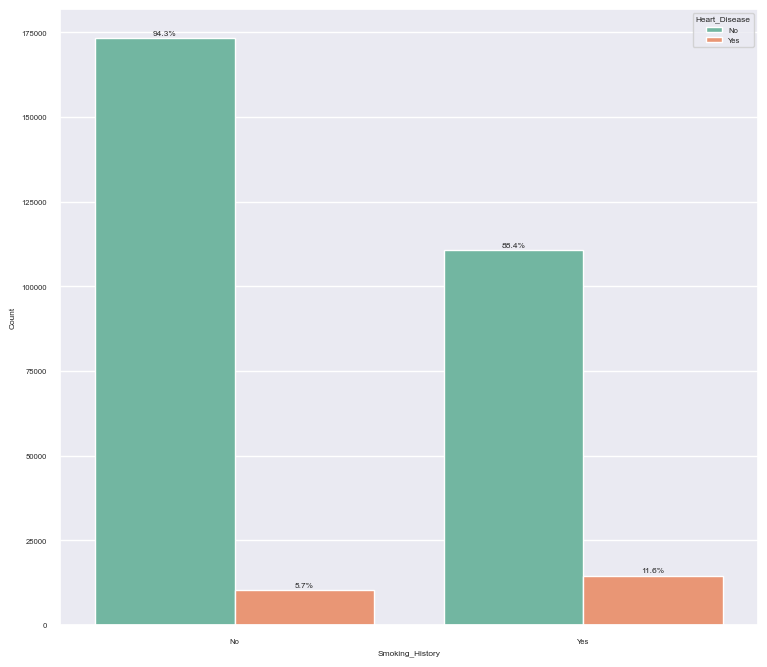

In [36]:
for i in categorical:
        if i == target:
            continue

        if df[i].nunique() > 15:
            print(f'column {i} has many unique values n = {df[i].nunique()} and will not be plotted')
            print('=======================================================')
            continue

        if i in df.columns:
            print(f'{i} vs. {target}')
            eda_bivariate_categorical(df,i,target)
            print('=======================================================')

## Numerical EDA

### Multivariate Analysis (Analysis of Correlation Between Each Numerical Dimension)

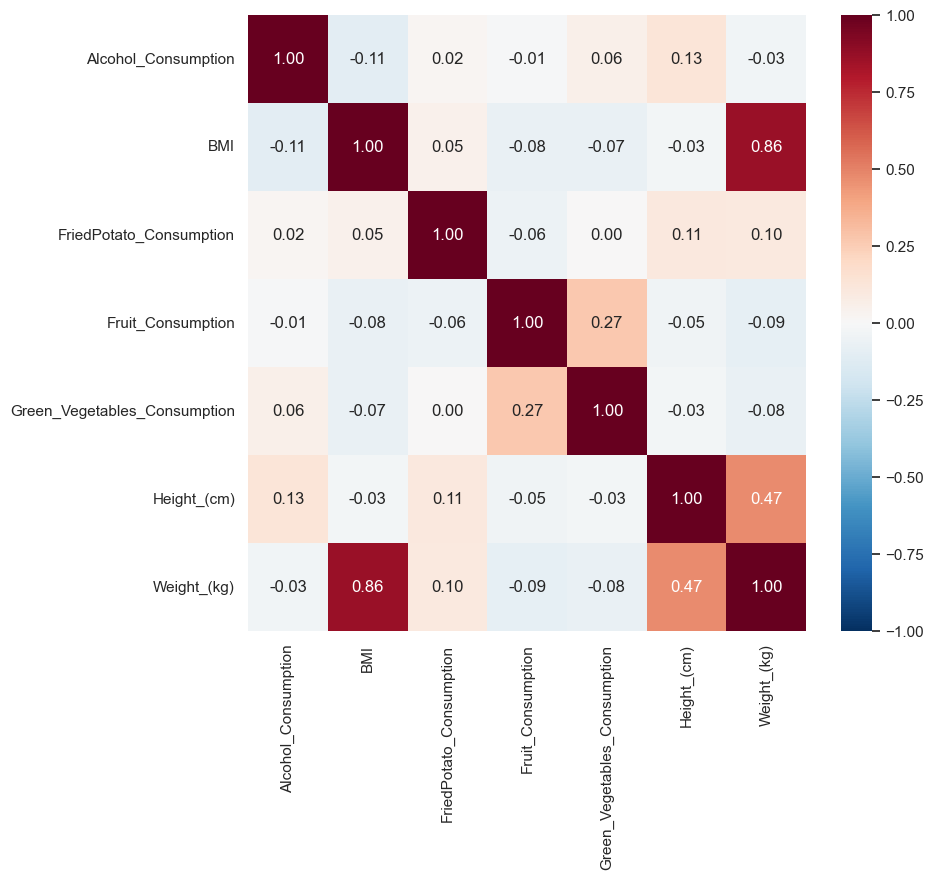

In [37]:
## Plotting the correlation matrix
correlation_matrix = df[numerical].corr()
plt.figure(figsize=(9,8))

sns.set(font_scale=1)

## use mask to cover the upper diagonal in the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix,
            cmap='RdBu_r',
            # cmap='RdYlGn',
            annot=True,
            # Masking the diagonal
            # mask=mask,
            fmt='.2f',
            vmin=-1, vmax=1)

plt.show()